# **Manasa Holla**

### Task #6 - Create the Decision Tree classifier and visualize it graphically. 

#### The purpose is if we feed any new data to this classifier, it would be able to
#### predict the right class accordingly. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.drop(['Id'],axis = 1, inplace = True)

In [6]:
iris.shape

(150, 5)

In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Data Visualisation

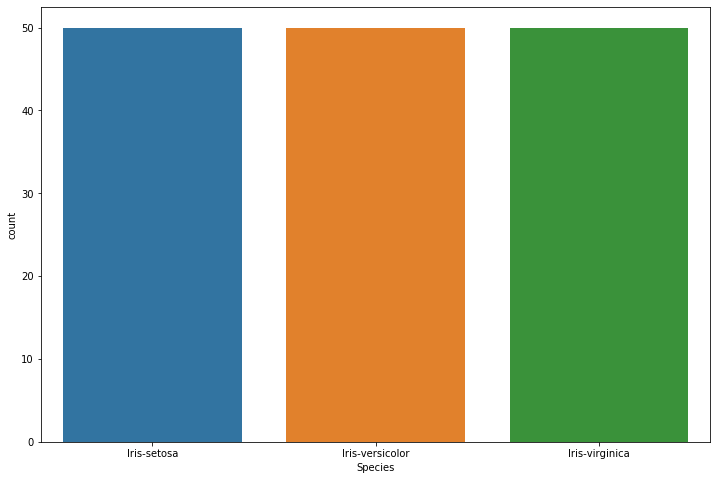

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=iris)

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

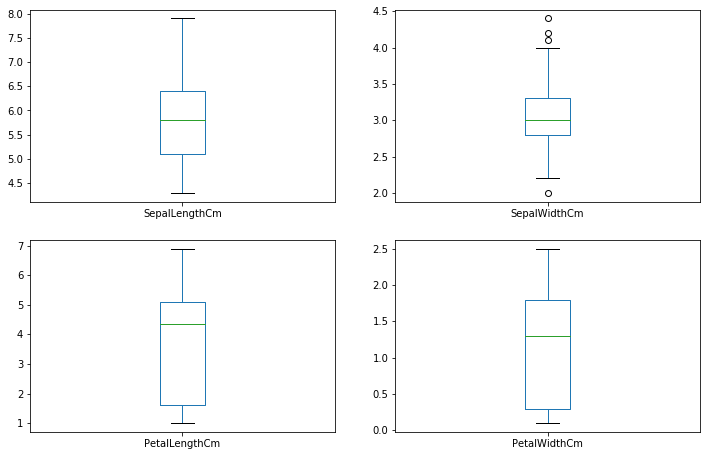

In [10]:
#Boxplot to check outliers
iris.plot(kind='box',subplots=True,layout=(3,2),figsize=(12,12),grid=False)

In [11]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


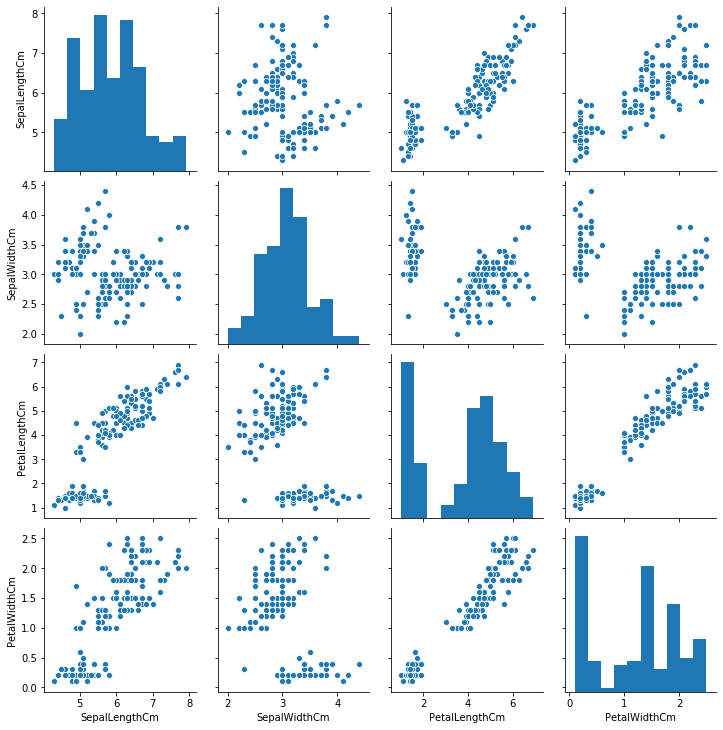

In [12]:
sns.pairplot(data=iris)

Train,Test,Split

we have necessary data, we can split the data into training and testing using scikit learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = iris.drop(['Species'],axis=1)
y = iris['Species']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
#fitting the data
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
#predicting the Data
pred = dtree.predict(x_test)
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [19]:
#compare original and predicted data
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
117,Iris-virginica,Iris-virginica
125,Iris-virginica,Iris-virginica
98,Iris-versicolor,Iris-versicolor
19,Iris-setosa,Iris-setosa
130,Iris-virginica,Iris-virginica


Metric evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
pd.Series(pred).value_counts()

Iris-setosa        18
Iris-virginica     15
Iris-versicolor    12
dtype: int64

In [22]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.92        45
   weighted avg       0.94      0.93      0.93        45



[[18  0  0]
 [ 0 10  1]
 [ 0  2 14]]


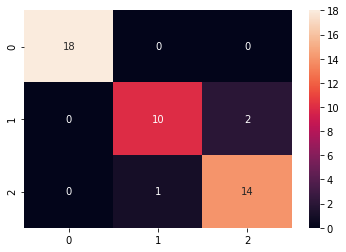

In [23]:
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(pred,y_test),annot = True)

In [24]:
np.mean(pred==y_test)

0.9333333333333333

[Text(1464.75, 2242.35, 'Petal_Length <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [32, 39, 34]\nclass = Iris-versicolor'),
 Text(976.5, 1834.6499999999999, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Iris-setosa'),
 Text(1953.0, 1834.6499999999999, 'Petal_Length <= 4.75\ngini = 0.498\nsamples = 73\nvalue = [0, 39, 34]\nclass = Iris-versicolor'),
 Text(976.5, 1426.9499999999998, 'Petal_Width <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(488.25, 1019.2499999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(1464.75, 1019.2499999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(2929.5, 1426.9499999999998, 'Petal_Length <= 5.05\ngini = 0.193\nsamples = 37\nvalue = [0, 4, 33]\nclass = Iris-virginica'),
 Text(2441.25, 1019.2499999999998, 'Sepal_Length <= 6.25\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]\nclass = Iris-virginica'),
 Text(1953.0, 611.55, 'Sepal_Width 

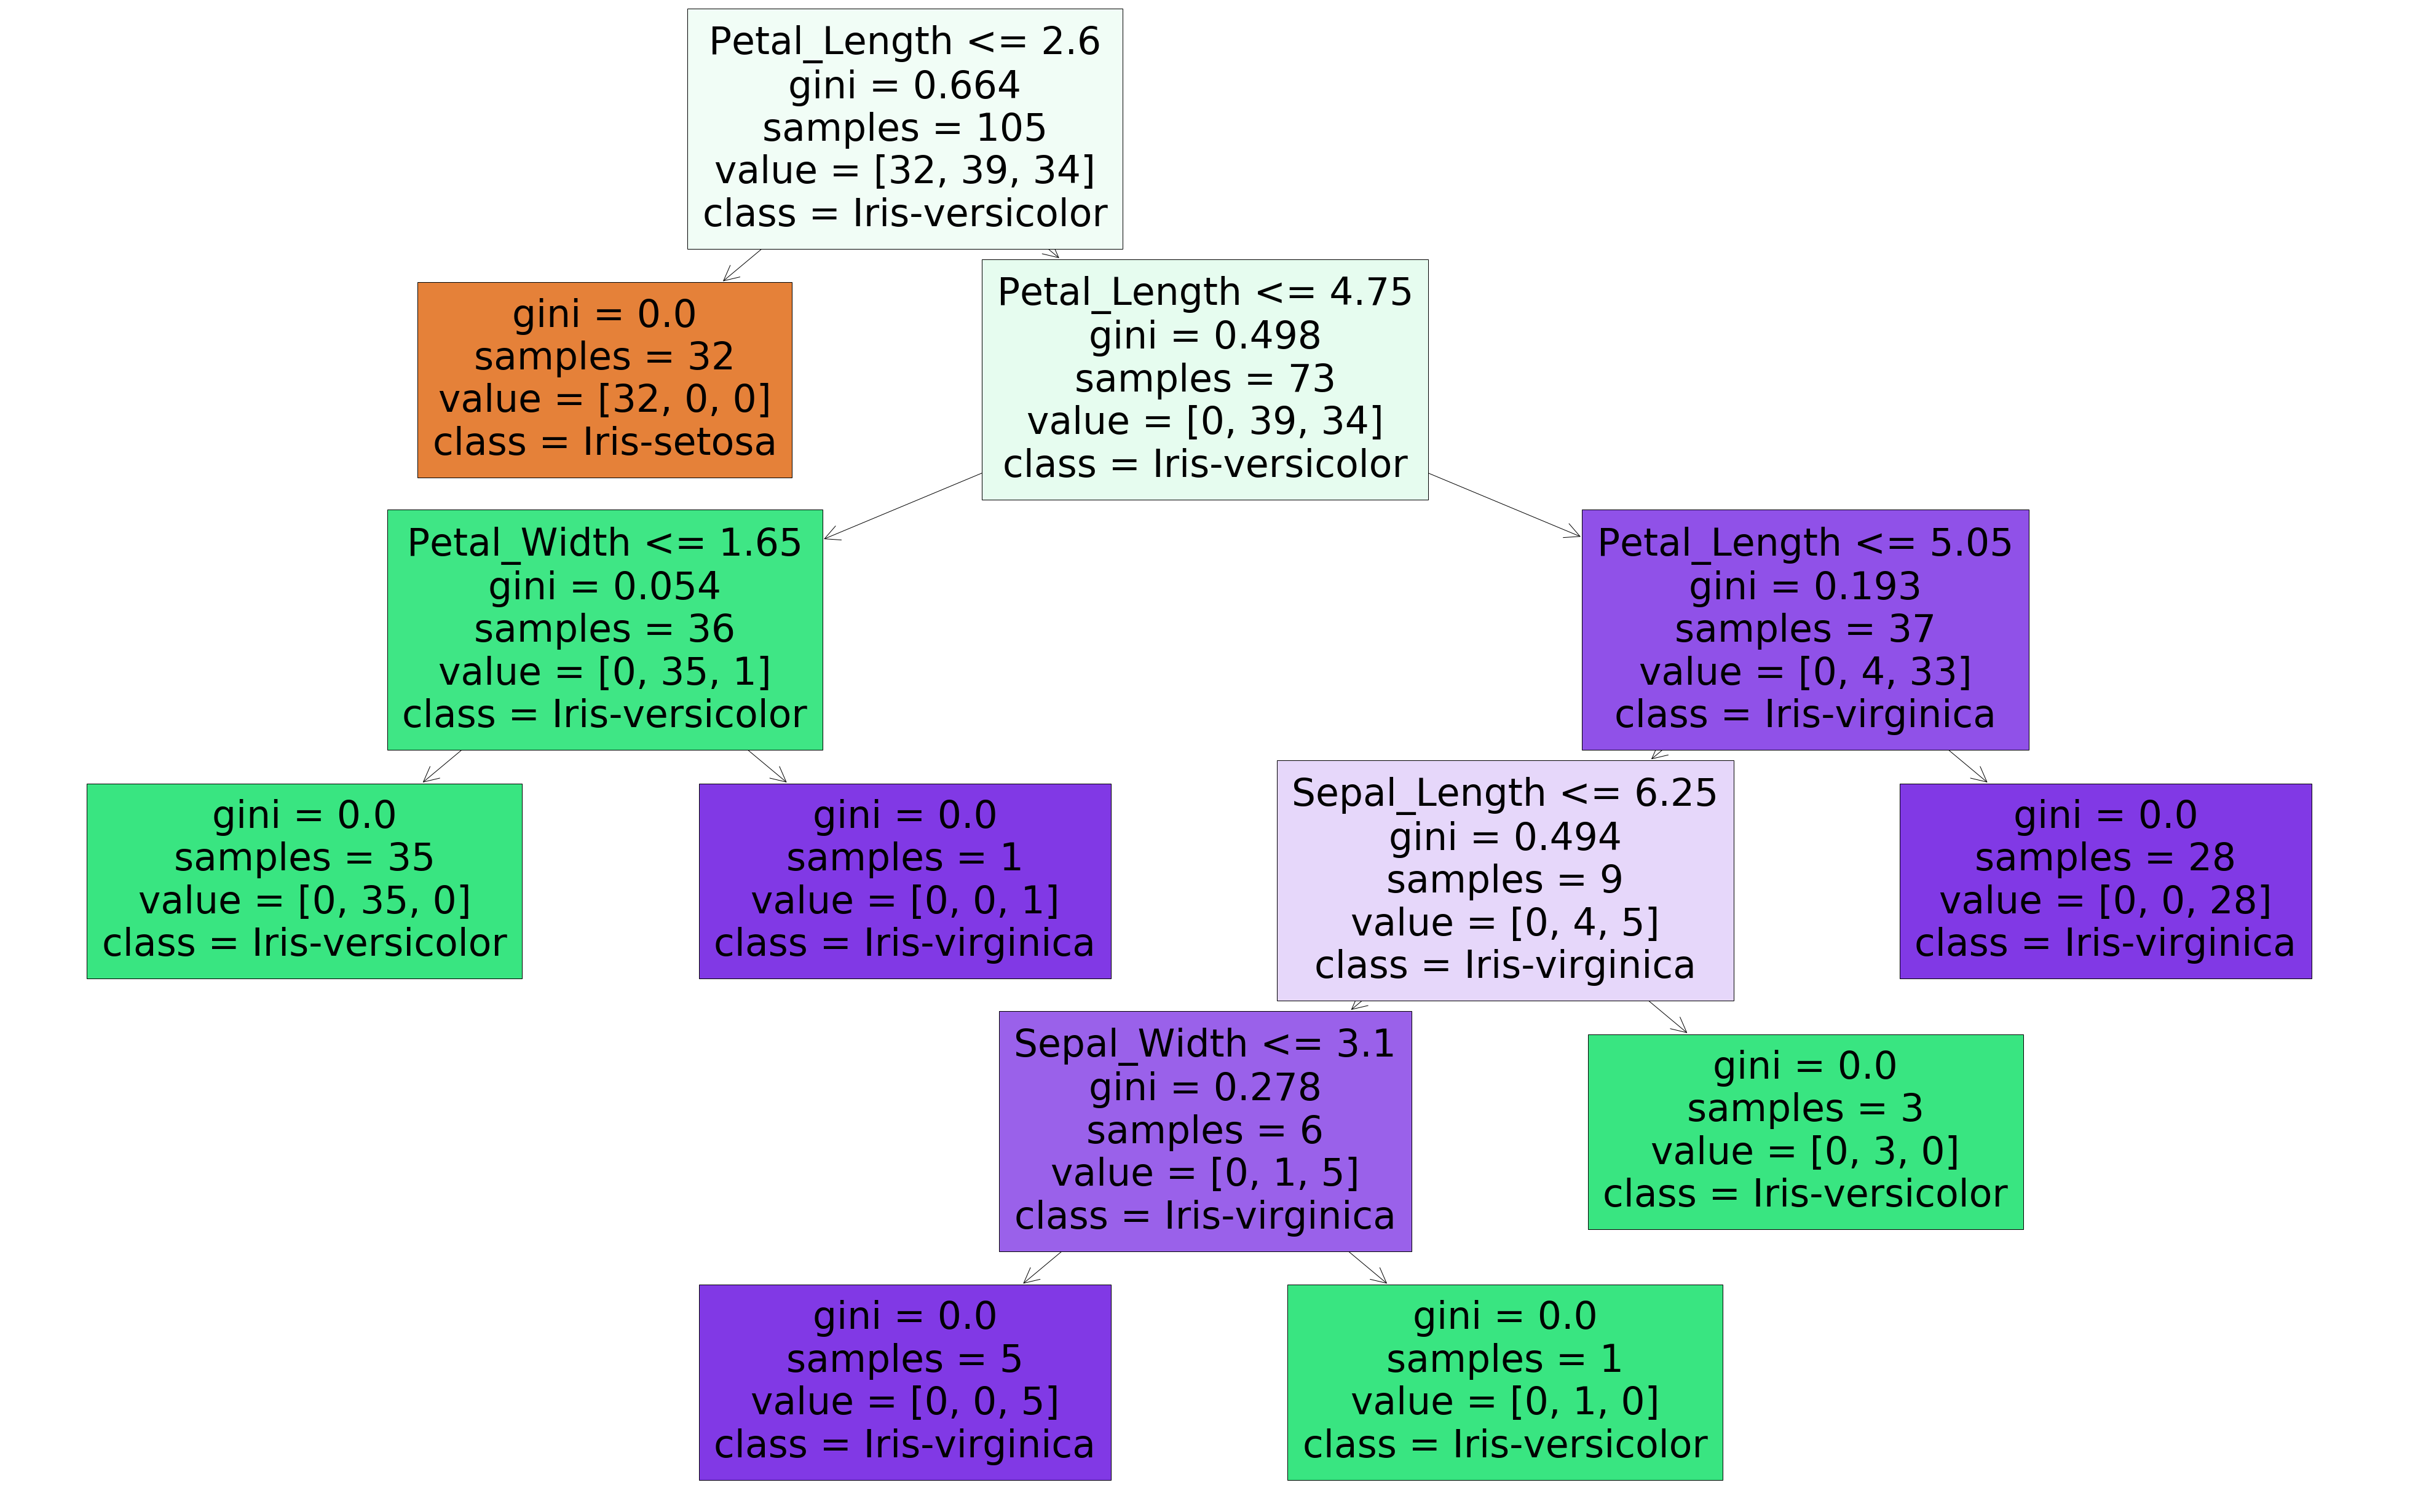

In [25]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
features_names=list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True)


If we feed any data into the model, it will predict iris class accordingly.